## Initial Prediction Model
The original README file says:
> Often, more than one contact to the same client was required, **in order to access if the product (bank term deposit) would be (or not) subscribed**

Therefore, let's start with a simple binary classification model to predict Deposit yes/no

In [1]:
#import the right libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#this option just allwos us to see every column in the notebook
pd.set_option('display.max_columns', None)

#pd.get_option("display.max_columns")

In [3]:
#pull in the dataset and turn into a DataFrame
bank_main_df = pd.read_csv('./Dataset_1_Bank Marketing/bank_marketing.csv',delimiter=';')
bank_main_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [4]:
bank_main_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
#checking the options available under the "deposit" field
bank_main_df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [6]:
#replacing the yes/no categorical values with 1/0 binary digits
bank_main_df['deposit'] = [0 if (bank_main_df['deposit'][i] == 'yes') else 1 for i in range(len(bank_main_df)) ]

In [7]:
#because we have so many cateogrical variables, we should one-hot encode them (i.e. create dummy categorical variables)
#we also use drop_first=True to reduce the redundant column count 
bank_main_df = pd.get_dummies(bank_main_df, drop_first=True)

bank_main_df

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143,5,261,1,-1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44.0,29,5,151,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33.0,2,5,76,1,-1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47.0,1506,5,92,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33.0,1,5,198,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45207,71.0,1729,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45208,72.0,5715,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45209,57.0,668,17,508,4,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [8]:
#note that only the "age" category has null values
pd.isnull(bank_main_df).sum()

age                    1339
balance                   0
day                       0
duration                  0
campaign                  0
pdays                     0
previous                  0
deposit                   0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_married           0
marital_single            0
education_secondary       0
education_tertiary        0
education_unknown         0
default_yes               0
housing_yes               0
loan_yes                  0
contact_telephone         0
contact_unknown           0
month_aug                 0
month_dec                 0
month_feb                 0
month_jan                 0
month_jul                 0
month_jun                 0
month_mar           

In [9]:
#for simplification, let's just drop the nulls for now
bank_main_df = bank_main_df.dropna()

### Setting up Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
#set up the X matrix and y target variable
X = bank_main_df.drop(columns='deposit')
y = bank_main_df['deposit']

#split the data appropriately into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [12]:
#instantiate scaler and LogisticRegression model
sc = StandardScaler()
logreg = LogisticRegression()

#fit/transform the X_train and X_test datasets
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#train the logreg model
logreg.fit(X_train_sc, y_train)

LogisticRegression()

In [13]:
#score the model
print(f"Train score: {logreg.score(X_train_sc,y_train)}")
print(f"Test score: {logreg.score(X_test_sc,y_test)}")

Train score: 0.900683816346467
Test score: 0.9032061996657043


In [14]:
#for the test dataset, make predictions for the target variable
y_preds = logreg.predict(X_test_sc)

In [15]:
print(f"Confusion matrix so we can find Type I / Type II errors:\n{confusion_matrix(y_true=y_test, y_pred=y_preds)}")

Confusion matrix so we can find Type I / Type II errors:
[[  567  1016]
 [  258 11321]]


In [16]:
print("Here is a classification report, based on the confusion matrix")
print(classification_report(y_true=y_test,y_pred=y_preds))

Here is a classification report, based on the confusion matrix
              precision    recall  f1-score   support

           0       0.69      0.36      0.47      1583
           1       0.92      0.98      0.95     11579

    accuracy                           0.90     13162
   macro avg       0.80      0.67      0.71     13162
weighted avg       0.89      0.90      0.89     13162



C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


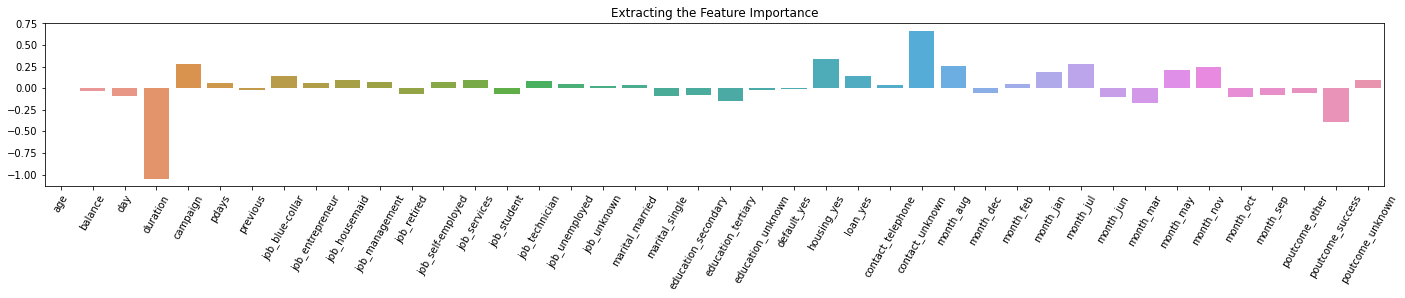

In [17]:
plt.figure(figsize=(24,3))
sns.barplot(X.columns,logreg.coef_[0])
plt.xticks(rotation=60)
plt.title("Extracting the Feature Importance");

### Further discussion for the group
* **What further refinements to the dataset should we make as part of the EDA / cleanup?**
    * Removing the *pdays* variable, for example
    * Handling outliers
* **How might the use of other classification algorithms and scalers affect the final predictions?**
    * Algorithms like LogisticRegression, DecisionTree, RandomForest, Kneighbors, NaiveBayes, neural net, etc.
    * Scalers like StandardScaler, MinMaxScaler, RobustScaler
    * PCA (principal component analysis) to reduce dimensions
* **Playing with parameters, pipelines, gridsearches to maximize True Negatives and minimize False Negatives**
    * That is, maximize deposit==1 correct predictions and reducing deposit==0 wrong predictions
    * Even if that means accidentally overpredicting the number of true deposits, better to try a bad path than miss a potential business opportunity
* **Extending this to other predictions**
    * e.g. predicting the "default" variable, or some other classification
    * e.g. predicting a range for continuous values based on categorical values
* **Best ways to impute missing data?**